# GradientBoostingClassifier: Breast Cancer dataset

### Initial imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()
print("cancer keys:\n{}".format(cancer.keys()))

cancer keys:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [27]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.25, random_state=0)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (426, 30)
y_train shape: (426,)


In [16]:
gbc = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [14]:
print("train set accuracy: {:.3f}".format(gbc.score(X_test, y_test)))
print("test set accuracy: {:.3f}".format(gbc.score(X_test, y_test)))

train set accuracy: 0.972
test set accuracy: 0.972


# Parameter tuning with GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {"learning_rate":[0.001, 0.01, 0.1, 1],
              "max_depth":[1,2,3,4,5],
              "n_estimators":[100,300,500,1000],
              "max_features":[5,10,15,20]}

gscv = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid, cv=5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1, 1], 'max_depth': [1, 2, 3, 4, 5], 'n_estimators': [100, 300, 500, 1000], 'max_features': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
print("GridSearCV train set accuracy: {:.3f}".format(gscv.score(X_train, y_train)))
print("GridSearCV test set accuracy: {:.3f}".format(gscv.score(X_test, y_test)))

GridSearCV train set accuracy: 1.000
GridSearCV test set accuracy: 0.972


In [31]:
print("gscv best parameters: {}".format(gscv.best_params_))

gscv best parameters: {'learning_rate': 1, 'max_depth': 1, 'max_features': 15, 'n_estimators': 100}


### Feature importances

In [32]:
gbclass = GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=100,
                                     max_features=15, random_state=0)

gbclass.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=1,
              max_features=15, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [33]:
print("train set accuracy: {:.3f}".format(gbclass.score(X_test, y_test)))
print("test set accuracy: {:.3f}".format(gbclass.score(X_test, y_test)))

train set accuracy: 0.972
test set accuracy: 0.972


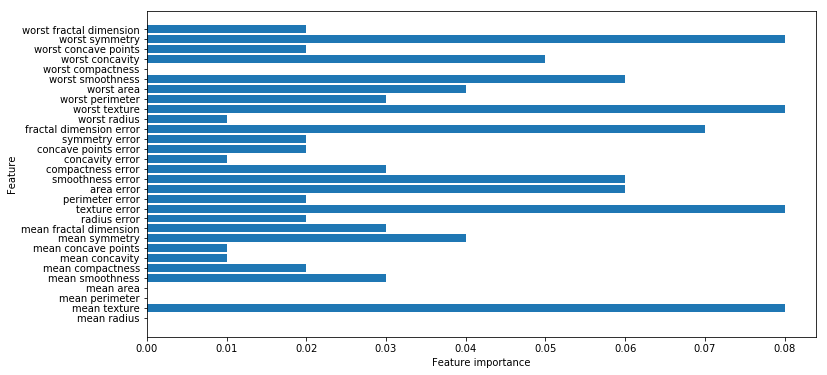

In [34]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(12,6))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(gbclass)